## Лабораторная работа 8.1.
## Определение постоянных Стефана-Больцмана и Планка из анализа излучения накаленного тела.


***Ход работы:***

* Проводим измерения с помощью пирометра для определения значения яркостной температуры модели АЧТ (она равна его термодинамической температуре):

$T_{яр}=901$ $ ^oC$

* Одновременно измеряем температуру модели АЧТ при помощи термопары и вольтметра (постоянная термопары 41 $мкв/^oC$, температура модели АЧТ измеряется термопарой относительно температуры комнаты):

$T=898$ $ ^oC$

Значения температуры, полученные обоими способами, мало отличаются друг от друга (не более 5%), следовательно оптический пирометр работает исправно:

$\Delta T$=901-988=3 ($^oC$) 

$\frac{\Delta T}{T}$=0.3 %

*** Измерение яркостной температуры накаленных тел ***

Различные тела, накаленные до одинаковой термодинамической температуры, имеют различную яркостную температуру.

Левое кольцо: $T_{яр}=750$ $ ^oC$

Правое кольцо: $T_{яр}<750$ $ ^oC$

Поверхность трубки: $T_{яр}=817$ $ ^oC$


*** Проверка закона Стефана-Больцмана ***

* Измеряем пирометром яркостную температуру нити лампы накаливания примерно через каждые 100 $ ^oC$ (с 900 $ ^oC$ до 1900 $ ^oC$). Также записываем величину тока и падения напряжения на нити лампы.


* Для каждого значения измеренной яркостной температуры найдем термодинамическую температуру вольфрамовой нити лампы, пользуясь графиком $T=f_1(T_{ярк})$


In [3]:
T_yark=[907, 1010, 1112, 1210, 1310, 1421, 1500, 1601, 1700, 1797, 1899]
T=[]
for t in T_yark:
    T.append(65*t/61-3200/61)
    
print(T)

[914.0163934426229, 1023.7704918032787, 1132.4590163934427, 1236.8852459016393, 1343.4426229508197, 1461.7213114754097, 1545.9016393442623, 1653.5245901639344, 1759.016393442623, 1862.3770491803277, 1971.0655737704917]


* Вычислим для каждого значения термодинамической температуры мощность, потребляемую нитью лампы. Результаты представим в виде графика $W=f_2(T)$:

$W=U I$

$W=\epsilon _T S \sigma T^4$

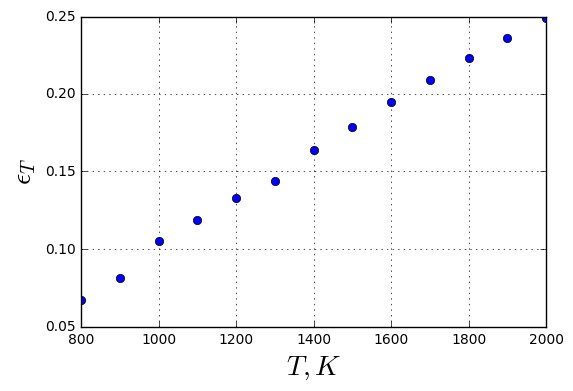

In [4]:
import matplotlib.pyplot as plt
import numpy as np

T_epsilon=[800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
epsilon=[0.067, 0.081, 0.105, 0.119, 0.133, 0.144, 0.164, 0.179, 0.195, 0.209, 0.223, 0.236, 0.249]

plt.plot(T_epsilon,epsilon, 'bo')
plt.xlabel('$T, K$',size=20)
plt.ylabel('$\epsilon _T$',size=20)

#Легенда
#plt.text(0.7,1600,'T=30 C',size=14)

plt.grid()
plt.show()

In [5]:
def linearfunc_koeff(x1, y1):
    sumxy=0
    sumx2=0
    sumy2=0
    sumx=0
    sumy=0
    
    n=len(x1)

    for x,y in zip(x1, y1):
        sumx+=x
        sumy+=y
        sumxy+=x*y
        sumx2+=x**2
        sumy2+=y**2

    sr_xy=sumxy/n
    sr_x2=sumx2/n
    sr_y2=sumy2/n
    srx=sumx/n
    sry=sumy/n

    b=(sr_xy-srx*sry)/(sr_x2-srx**2)
    sigmab=(1/n**0.5)*((sr_y2-sry**2)/(sr_x2-srx**2)-b**2)**0.5
    a=sry-b*srx
    sigmaa=sigmab*(sr_x2-srx**2)**0.5
    
    return (b, sigmab, a, sigmaa) #y=a+bx

In [22]:
b, sigmab, a, sigmaa = linearfunc_koeff(T_epsilon, epsilon)

print('epsilon={:.3} + {:.3} * T'.format(a,b))

epsilon=-0.0511 + 0.000152 * T


In [7]:
eps_T=[]
for t in T:
    eps_T.append(-0.05107692307692285 + 0.00015208791208791195 * t)
    
print(eps_T)

[0.0879339218158891, 0.10462619347865257, 0.1211564042514863, 0.13703837146460102, 0.15324446045757525, 0.1712332192397766, 0.18403602954422627, 0.20040417942713024, 0.21644820753017474, 0.23216811385335967, 0.2486983246261934]


In [16]:
%%time
sum(range(100000000))

Wall time: 7.29 s


4999999950000000

In [17]:
%%time
np.arange(100000000).sum()

Wall time: 614 ms


887459712

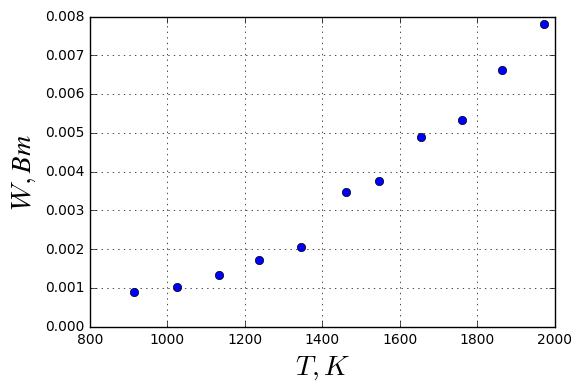

In [8]:
U=[1.71, 1.87, 2.28, 2.72, 3.07, 4.38, 4.62, 5.51, 5.83, 6.73, 7.50]
I0= np.array([0.523, 0.542, 0.588, 0.634, 0.670, 0.793, 0.814, 0.889, 0.914, 0.984, 1.041])
I = I0**-3
# I=[i*10**(-3) for i in I0]
W=[] # в ваттах будет
for i in range(len(U)):
    W.append(U[i]*I[i])

plt.plot(T,W, 'bo')
plt.xlabel('$T, K$',size=20)
plt.ylabel('$W, Вт$',size=20)

#Легенда
#plt.text(0.7,1600,'T=30 C',size=14)

plt.grid()
plt.show()

* Для проверки закона Стефана-Больцмана построим в логарифмическом масштабе график зависимости $W=\epsilon _T B T^n$, т.е. функцию $lnW=ln(\epsilon _T B) + n lnT$ и определим величину n как тангенс угла наклона прямой в области высоких температур (когда мощность, подводимая к нити, практически полностью расходуется на излучение). Величина n должна быть близка к 4.



$lnW-ln(\epsilon _T B) = n lnT$

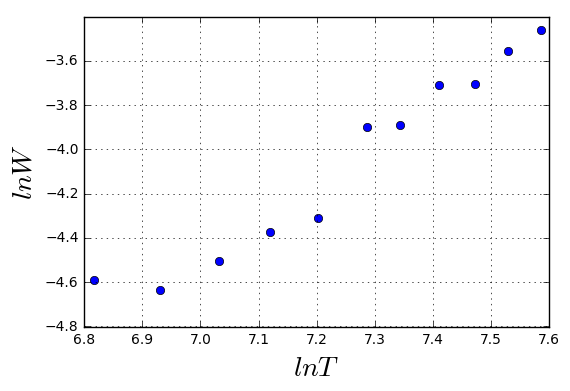

In [15]:
# lnW=[np.log(w) for w in W]
# lnT=[np.log(t) for t in T]
lnW = np.log(W)
lnT = np.log(T)
deltaW = lnW - np.log(eps_T)
# deltaW= [lnW[i]-np.log(eps_T[i]) for i in range(len(T))]

#print(lnT, deltaW)

plt.plot(lnT,deltaW, 'bo')
plt.xlabel('$lnT$',size=20)
plt.ylabel('$lnW$',size=20)

#Легенда
#plt.text(0.7,1600,'T=30 C',size=14)

plt.grid()
plt.show()

In [14]:
lnT_new=[ 7.2873700007133024, 7.3433626044482381, 7.4106644038951401, 7.4725100644454789, 7.529608934211792, 7.5863295758892599]
deltaW_new=[-3.8979098154592302, -3.8905317590664832, -3.7114296447214494, -3.7042589998004116, -3.557015976201233, -3.4611558040864141]

b, sigmab, a, sigmaa = linearfunc_koeff(lnT_new, deltaW_new)

print('n=',b,'+-', sigmab)

n= 1.5089956806156792 +- 0.138348893848172


$B= S \sigma$

* Найдем величину постоянной Стефана-Больцмана по формуле $\sigma = \frac{W}{\epsilon _T S T^4}$ для каждого измеренного значения Т, превышающего 1700 К.

In [20]:
sigma=[W[i]/(eps_T[i]*0.36*10**(-4)*T[i]**4) for i in range(8,11)]
print(sigma)
s1=sigma[1] # это типа в си


[7.142968061486249e-11, 6.586195906382093e-11, 5.777398730746128e-11]


* По найденным значениям $\sigma$ определим величину постоянной Планка h по формуле $h=\sqrt[3]{\frac{2 \pi ^5 k_Б^4}{15 c^2 \sigma}}$

In [21]:
h=(2*(np.pi**5)*(1.38**4)*10**(-23*4)/15/(3**2)*(10**16)/s1)**(1/3)
print(h)

2.922642961044753e-22


Вопросы: 

Распределение планка

Идеальный фотонный газ

Закон стеф больцмана


*** Идеальный фотонный газ ***

Термодинамика фотонного газа рассматривает электромагнитное излучение, используя понятия и методы термодинамики.

Электромагнитное излучение с корпускулярной точки зрения представляет собой фотонный газ с переменным числом частиц. Распространение понятий, законов и методов термодинамики на фотонный газ подразумевает, что электромагнитное излучение допустимо рассматривать как термическую систему, то есть как объект изучения, к которому применимо понятие температуры излучения.

Особенности фотонного газа

* Масса покоя фотона равна нулю.
* Фотон электронейтрален, всегда движется со скоростью света (ультрарелятивистская частица) и обладает энергией, импульсом и равным 1 спином, то есть относится к бозонам. При неупругом столкновении с частицей вещества фотон исчезает, передавая свои энергию и импульс этой частице.
* Квантовая электродинамика допускает взаимодействие фотонов друг с другом, однако вероятность такого их поведения исчезающе мала, поэтому фотоны внутри некоторого объёма обычно рассматривают как совокупность не взаимодействующих между собой частиц, то есть как идеальный бозе-газ.

В состоянии равновесия электромагнитное излучение (фотонный газ) внутри полости в абсолютно чёрном теле характеризуют теми же термодинамическими величинами, что и обычный газ: объёмом, давлением, температурой, внутренней энергией, энтропией и т. д. Излучение оказывает давление на стенки полости за счёт того, что фотоны обладают импульсом; температура равновесного фотонного газа совпадает с температурой стенок. 

Основные термодинамические соотношения для равновесного теплового излучения (фотонного газа):

Давление

${\displaystyle P={\frac {\alpha }{3}}T^{4},} $	(Термическое уравнение состояния)

где α — радиационная постоянная, связанная с постоянной Стефана — Больцмана σ соотношением

${\displaystyle \alpha ={\frac {4\sigma }{c}},} $	(Радиационная постоянная)
(c — скорость света в вакууме).

В выражение для давления, представляющее собой термическое уравнение состояния фотонного газа, не входит объём, то есть фотонный газ представляет собой систему с одной термодинамической степенью свободы. В качестве единственной независимой переменной, используемой для описания состояние фотонного газа, традиционно выбирают температуру. Это означает, что для фотонного газа термическое равновесие есть необходимое и достаточное условие равновесия термодинамического, то есть в данном конкретном случае эти понятия эквивалентны друг другу.

Внутренняя энергия как функция температуры (закон Стефана — Больцмана):

$ {\displaystyle U=\alpha VT^{4}.} $	(Калорическое уравнение состояния для внутренней энергии)

Из этого выражения видно, что внутренняя энергия фотонного газа аддитивна по объёму. Важно, что от объёма системы зависит число находящихся в нём фотонов и, следовательно, энергия теплового излучения и другие аддитивные функции состояния, но не плотности этих величин, которые зависят только от температуры. 

$ {\displaystyle u\equiv {\frac {U}{V}}=\alpha T^{4}.} $	(Калорическое уравнение состояния для внутренней энергии)

С использованием внутренней энергии в качестве независимой переменной термическое уравнение состояния фотонного газа:

$ {\displaystyle PV={\frac {1}{3}}U,} $ (Термическое уравнение состояния)

или так:

$ {\displaystyle P={\frac {1}{3}}u.} $